In [10]:
import numpy as np
from graspy.match import GraphMatch
from graspy.simulations import er_corr
from graspy.plot import heatmap
import matplotlib.pyplot as plt

<AxesSubplot:>

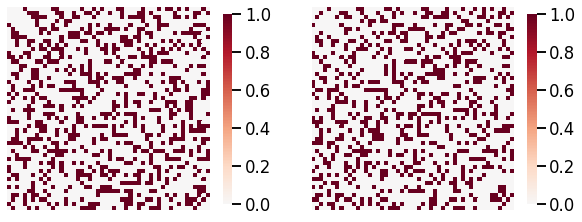

In [3]:
n = 50
p = .3
r = .7

G1, G2 = er_corr(n, p, r)

fix, axes = plt.subplots(1, 2, figsize=(10,5))
heatmap(G1, ax=axes[0])
heatmap(G2, ax=axes[1])

<AxesSubplot:title={'center':'G2-G1 matched'}>

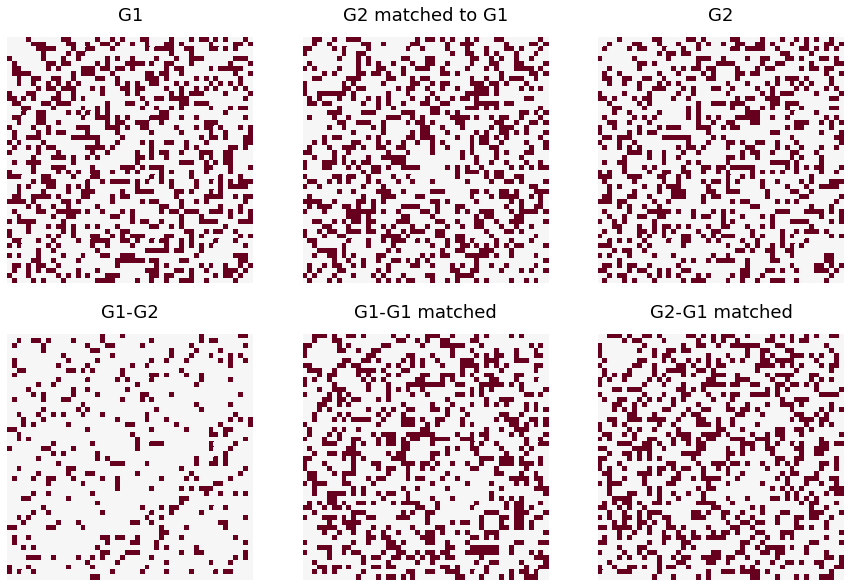

In [20]:
gmp = GraphMatch()

gmp.fit(G1, G2)
G1_matched = G1[np.ix_(gmp.perm_inds_, gmp.perm_inds_)]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
heatmap(G1, ax=axes[0, 0], title="G1", cbar=False)
heatmap(G1_matched, ax=axes[0, 1], title="G2 matched to G1", cbar=False)
heatmap(G2, ax=axes[0, 2], title="G2", cbar=False)
heatmap(abs(G1-G2), ax=axes[1, 0], title="G1-G2", cbar=False)
heatmap(abs(G1-G1_matched), ax=axes[1,1], title="G1-G1 matched", cbar=False)
heatmap(abs(G2-G1_matched), ax=axes[1,2], title="G2-G1 matched", cbar=False)

In [21]:
gmp.get_params()

{'eps': 0.1,
 'gmp': True,
 'init_method': 'barycenter',
 'max_iter': 30,
 'n_init': 1,
 'shuffle_input': True}

In [22]:
from sklearn.base import BaseEstimator

In [23]:
??BaseEstimator

Init signature: BaseEstimator()
Source:        
class BaseEstimator:
    """Base class for all estimators in scikit-learn

    Notes
    -----
    All estimators should specify all the parameters that can be set
    at the class level in their ``__init__`` as explicit keyword
    arguments (no ``*args`` or ``**kwargs``).
    """

    @classmethod
    def _get_param_names(cls):
        """Get parameter names for the estimator"""
        # fetch the constructor or the original constructor before
        # deprecation wrapping if any
        init = getattr(cls.__init__, 'deprecated_original', cls.__init__)
        if init is object.__init__:
            # No explicit constructor to introspect
            return []

        # introspect the constructor arguments to find the model parameters
        # to represent
        init_signature = inspect.signature(init)
        # Consider the constructor parameters excluding 'self'
        parameters = [p for p in init_signature.parameters.values()